In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

In [2]:
user_based_data=pd.read_csv('user_based_data.csv')
user_based_data.head(3)

,user_id,C011010,C011011,C011020,C011021,C011022,C011023,C011024,C011026,C011027,...,C099391,C099392,C099393,C099394,C099395,C099396,C099397,C099400,C099410,C099411
0,00039bc1-c70c-404d-9a16-5ec2227061f7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0007d630-bb89-4682-a59e-fffa85eeee30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0010e97e-641a-4e39-b811-3b9edcccbc1c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x = user_based_data.drop(['user_id'], axis = 1)

In [4]:
len(x)

25366

In [24]:
k = 650

kmeans = KMeans(n_clusters=k, random_state=42)
clusters_pred = kmeans.fit_predict(x)

In [25]:
kmeans.inertia_

30568.939421381678

In [26]:
kmeans.cluster_centers_

array([[ 1.73472348e-18, -1.73472348e-18, -1.84314369e-18, ...,
         1.08420217e-18,  8.67361738e-19,  6.77626358e-20],
       [ 4.52232900e-04, -8.76035355e-17,  1.58510358e-16, ...,
         7.91407575e-04, -7.13405029e-17,  1.10995197e-17],
       [ 4.33680869e-19, -2.16840434e-19, -1.08420217e-19, ...,
         0.00000000e+00,  2.16840434e-19,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.16840434e-19,  0.00000000e+00,  1.35525272e-20],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [27]:
kmeans_label = pd.DataFrame(kmeans.labels_)

In [28]:
kmeans_data = pd.concat([user_based_data.user_id, kmeans_label], axis = 1)

In [29]:
kmeans_data.head()

,user_id,0
0,00039bc1-c70c-404d-9a16-5ec2227061f7,201
1,0007d630-bb89-4682-a59e-fffa85eeee30,50
2,0010e97e-641a-4e39-b811-3b9edcccbc1c,1
3,001129e7-1c73-4cd7-bc6a-a449eed3043a,291
4,0018e637-3354-46d8-9ec8-5886e680e4f4,1


In [30]:
kmeans_data.columns = ['user_id', 'group']

In [33]:
group_num = []
for i in range(k):
    group_num.append(len(kmeans_data.group[kmeans_data.group==i]))
    

In [34]:
group_num

[119,
 8845,
 11,
 1,
 1,
 67,
 303,
 8,
 952,
 22,
 7,
 57,
 1,
 13,
 1,
 457,
 69,
 50,
 44,
 1168,
 43,
 4,
 1,
 137,
 2,
 131,
 28,
 1,
 13,
 40,
 59,
 39,
 48,
 89,
 4,
 1,
 312,
 106,
 6,
 29,
 2,
 1,
 181,
 26,
 2,
 4,
 152,
 9,
 114,
 215,
 129,
 1,
 7,
 14,
 1,
 5,
 72,
 1,
 66,
 13,
 62,
 572,
 43,
 34,
 13,
 12,
 7,
 3,
 312,
 11,
 52,
 18,
 9,
 2,
 21,
 24,
 114,
 12,
 156,
 201,
 2,
 25,
 24,
 2,
 1,
 69,
 39,
 199,
 36,
 4,
 17,
 5,
 1,
 1,
 1,
 78,
 1,
 84,
 170,
 1,
 19,
 1,
 12,
 37,
 47,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 148,
 11,
 1,
 1,
 2,
 9,
 1,
 3,
 19,
 42,
 29,
 1,
 31,
 2,
 2,
 45,
 1,
 1,
 1,
 71,
 2,
 1,
 58,
 13,
 1,
 1,
 12,
 28,
 134,
 114,
 1,
 1,
 1,
 1,
 1,
 62,
 1,
 28,
 1,
 1,
 1,
 68,
 1,
 61,
 19,
 1,
 9,
 31,
 1,
 1,
 195,
 9,
 14,
 1,
 1,
 54,
 118,
 1,
 27,
 1,
 5,
 140,
 54,
 1,
 1,
 9,
 20,
 41,
 48,
 37,
 7,
 3,
 29,
 1,
 15,
 39,
 2,
 63,
 66,
 1,
 65,
 2,
 72,
 2,
 37,
 13,
 1,
 23,
 40,
 81,
 37,
 252,
 4,
 1,
 1,
 1,
 1,
 2,
 1,
 76,
 3,
 1,


In [47]:
group_num = pd.DataFrame(group_num)
group_num.columns = ['group_num']

In [48]:
group_num.head()

,group_num
0,119
1,8845
2,11
3,1
4,1


In [54]:
group_num = group_num.reset_index(drop = False)
group_num.columns = ['group', 'group_num']

In [49]:
kmeans_data.to_csv('kmeans_data.csv',index=0)

In [57]:
group_num.to_csv('kmeans_group_num.csv',index=0)

# 以下是用來判斷，k 要選多少好

## inertias 就是 SSE (sum of square error)

In [16]:
klist = [450,500,550,600,650]

In [17]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(x)
                for k in klist]
inertias = [model.inertia_ for model in kmeans_per_k]

In [18]:
inertias

[35353.07922418071,
 33994.0679359563,
 32741.106241357433,
 31609.845687830664,
 30568.939421381678]

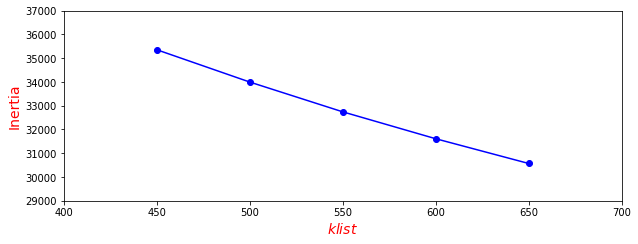

In [23]:
plt.figure(figsize=(10, 3.5))
plt.plot(klist,inertias, "bo-")
plt.xlabel("$klist$", fontsize=14,color='red')
plt.ylabel("Inertia", fontsize=14,color='red')
plt.axis([klist[0]-50, klist[-1]+50, 29000, 37000])

plt.show()


In [35]:
silhouette_scores = [silhouette_score(x, kmeans.labels_)
                     for model in kmeans_per_k[1:]]

In [36]:
silhouette_scores

[0.4502245307557006,
 0.4502245307557006,
 0.4502245307557006,
 0.4502245307557006]

## Silhouette Coefficient 越大代表分群效果越好

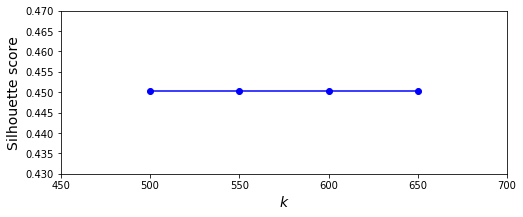

In [46]:
plt.figure(figsize=(8, 3))
plt.plot(klist[1:], silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([klist[1]-50, klist[-1]+50, 0.43, 0.47])

plt.show()